Load the `ISLR2` and `tidyverse` packages.

In [12]:
library(ISLR2)
library(tidyverse)
library(recipes)
library(tidymodels)


── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.8     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [6]:

glimpse(Auto)


Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

`geom_smooth()` using formula = 'y ~ x'


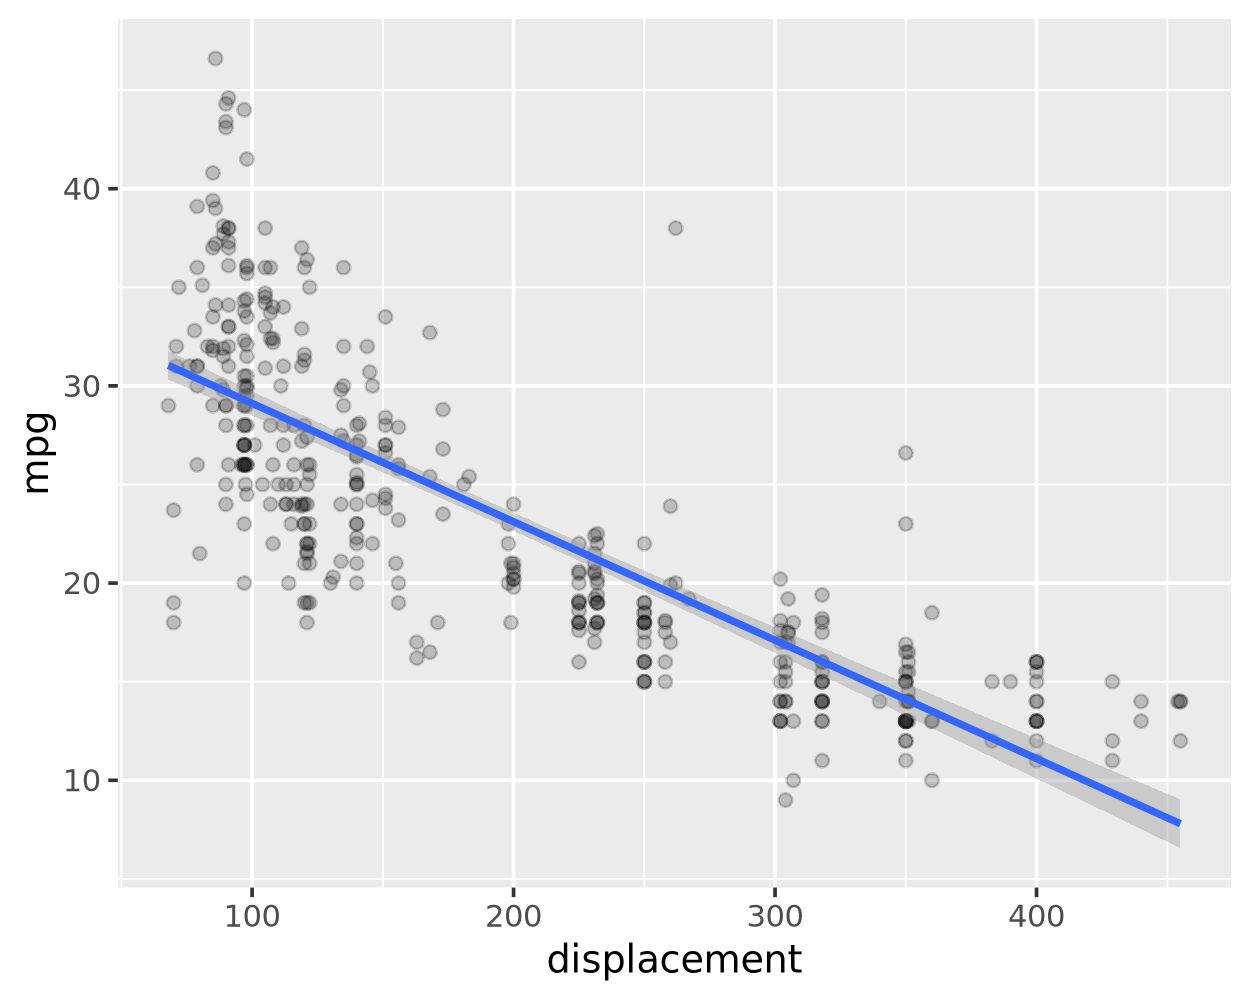

In [7]:
ggplot(Auto, aes(x = displacement, y = mpg)) + 
    geom_point(alpha = 0.2) +
    stat_smooth(method = 'lm')



❓Does the relationship of `mpg` to `displacement` look linear?

It looks reasonably linear.



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

mpg,displacement_poly_1,displacement_poly_2,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,0.054411339,-0.0350771560,0,0,0,1
15,0.075192305,0.0104041843,0,0,0,1
18,0.059727400,-0.0253504639,0,0,0,1
16,0.052961505,-0.0375022228,0,0,0,1
17,0.051994948,-0.0390647275,0,0,0,1
15,0.113371289,0.1462071653,0,0,0,1
14,0.125453246,0.2032764862,0,0,0,1
14,0.118687350,0.1704828862,0,0,0,1
14,0.125936524,0.2057001960,0,0,0,1


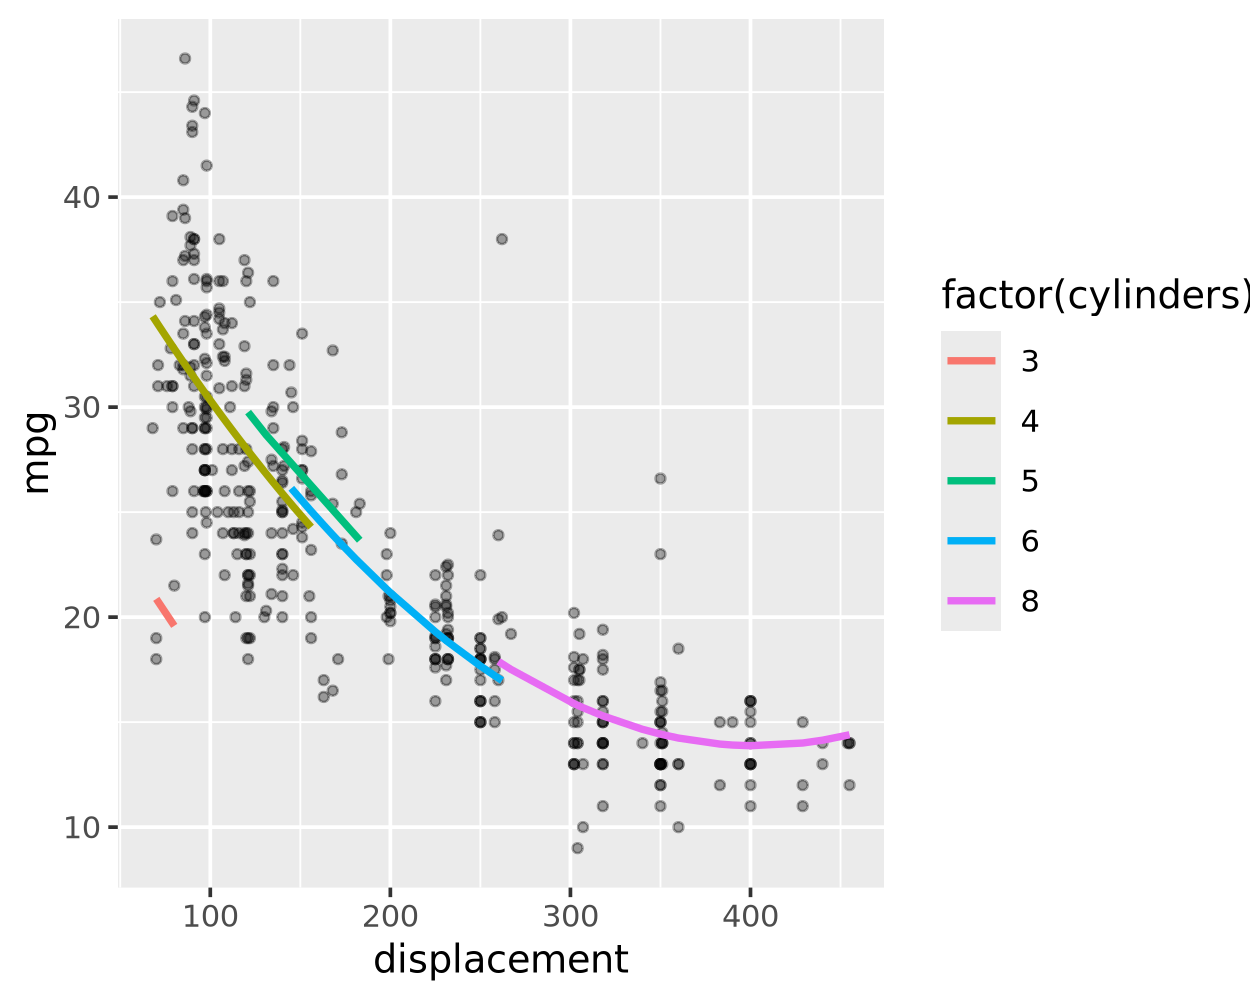

In [23]:
rec = recipe(mpg ~ displacement + cylinders, data=Auto) |>
    step_poly(displacement, degree=2) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    step_rm(cylinders)

mod = linear_reg() |> set_engine('lm')

rec_prepped  = prep(rec, Auto) 

rec_prepped |> 
    juice()

mod_fit = mod |> fit(mpg ~ ., juice(rec_prepped))

predict(mod_fit, rec_prepped |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
